# Fixation analysis (fixations)
# Fixation compressed (1DF)



## Load fixation and trial information 

In [24]:
data_fix_1 = pd.read_csv('/Users/pradyumna/Documents/GiTs/FF2018/Output/fixation_FFA_Collapsed_AllConditions_31.csv') 
data_exp1 = pd.read_csv('/Users/pradyumna/Documents/GiTs/FF2018/Output/DataFoodFramingNotebook_31.csv') 

print (data_exp1["Part"].unique())
print ('Number of participants: ' + str(len(data_exp1["Part"].unique())))

[ 1  2  3  4  5  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 26 27 28
 29 31 32 34 35 36 39]
Number of participants: 31


## Add microsaccades info 

In [25]:
data_exp1_microSc = pd.read_csv('/Users/pradyumna/Documents/GiTs/FF2018/Output/Microfixations_AllConditions_31.csv') 
data_exp1 = data_exp1.reset_index()

data_exp1['LmSacc'] = data_exp1_microSc['microfix1_drop']
data_exp1['RmSacc'] = data_exp1_microSc['microfix2_drop']
data_exp1['DmSacc'] = data_exp1_microSc['microfix2_drop'] - data_exp1_microSc['microfix1_drop']
data_exp1['AbsDmSacc'] = abs(data_exp1_microSc['microfix2_drop'] - data_exp1_microSc['microfix1_drop'])
data_exp1['TotmSacc'] = data_exp1_microSc['microfix2_drop'] + data_exp1_microSc['microfix1_drop']


data_exp1['LmSaccTime'] = data_exp1_microSc['microfix_1_drop_timeavg']
data_exp1['RmSaccTime'] = data_exp1_microSc['microfix_2_drop_timeavg']
data_exp1['DmSaccTime'] = data_exp1_microSc['microfix_2_drop_timeavg'] - data_exp1_microSc['microfix_1_drop_timeavg']
data_exp1['AbsDmSaccTime'] = abs(data_exp1_microSc['microfix_2_drop_timeavg'] - data_exp1_microSc['microfix_1_drop_timeavg'])



data_exp1["zLmSacc"] = z_score1(data_exp1,'Part',"LmSacc")
data_exp1["zRmSacc"] = z_score1(data_exp1,'Part',"RmSacc")
data_exp1["zDmSacc"] = z_score1(data_exp1,'Part',"DmSacc")
data_exp1["zAbsDmSacc"] = z_score1(data_exp1,'Part',"AbsDmSacc")
data_exp1["zTotmSacc"] = z_score1(data_exp1,'Part',"TotmSacc")

data_exp1["zLmSaccTime"] = z_score1(data_exp1,'Part',"LmSaccTime")
data_exp1["zRmSaccTime"] = z_score1(data_exp1,'Part',"RmSaccTime")
data_exp1["zDmSaccTime"] = z_score1(data_exp1,'Part',"DmSaccTime")
data_exp1["zAbsDmSaccTime"] = z_score1(data_exp1,'Part',"AbsDmSaccTime")


In [26]:
data_exp1=data_exp1.rename(index=str, columns={"ChosenITM":"Choice", 
                              "ChoiceRT":"RT",
                             "RValue":"RVal",
                             "LValue":"LVal",
                             "zRValue":"zRVal",
                             "zLValue":"zLVal",                    
                             "tDDT":"DDT",
                             "absDDT":"zAbsDDT",
                             "lIA_DT":"LDwellTime",
                             "rIA_DT":"RDwellTime",
                             "tGSF":"GSF",
                             "lastFixat":"LastFixat",
                             "DV":"DVal",
                             "zDV":"zDVal",
                             "absDV":"AbsDVal",
                             "zAbsDV":"zAbsDVal",                    
                             "zChoiceRT":"zRT",
                             "FamCh":"ChosenFam",
                              "FamUnCh":"UnchosenFam",
                              "ValCh":"ChosenVal",
                              "ValUnCh":"UnchosenVal",
                             "zFamCh":"zChosenFam",
                              "zFamUnCh":"zUnchosenFam",
                              "zValCh":"zChosenVal",
                              "zValUnCh":"zUnchosenVal",                   
                              "GSFMedSplit":"GSFSplit",
                            "DDTMedSplit":"DDTSplit"})


In [27]:
## Add column with the item with higher value for each trial

data_exp1["zHighVal"] = data_exp1[["zRVal", "zLVal"]].max(axis=1)
data_exp1["zLowVal"] = data_exp1[["zRVal", "zLVal"]].min(axis=1)

data_exp1['HighValPos'] = np.where((data_exp1['zHighVal'] == data_exp1['zLVal']) , 1, 2)
data_exp1['LowValPos'] = np.where((data_exp1['zLowVal'] == data_exp1['zLVal']) , 1, 2)

## Add normalized microsaccades (nº of microsaccades / dwelling time)

data_exp1['NormLmSacc'] = data_exp1['LmSacc']/data_exp1['LDwellTime']
data_exp1['NormRmSacc'] = data_exp1['RmSacc']/data_exp1['RDwellTime']

data_exp1['NormDmSacc']  = data_exp1['NormRmSacc'] - data_exp1['NormLmSacc'] 
data_exp1['AbsNormDmSacc']  = abs(data_exp1['NormRmSacc'] - data_exp1['NormLmSacc']) 

data_exp1["zNormDmSacc"] = z_score1(data_exp1,'Part',"NormDmSacc")
data_exp1["zAbsNormDmSacc"] = z_score1(data_exp1,'Part',"AbsNormDmSacc")


In [28]:
par_list = data_fix_1["parcode"].unique()
parInfoList = data_exp1["Part"].unique()
print('Participants names')
print(par_list)
print(parInfoList)

Participants names
[ 1  2  3  4  5  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 26 27 28
 29 31 32 34 35 36 39]
[ 1  2  3  4  5  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 26 27 28
 29 31 32 34 35 36 39]


In [31]:
data_fix_1.head()

,parcode,trial,fix_item,fix_time,rt,block
0,1,0,0,601,3327,2.0
1,1,0,1,878,3327,2.0
2,1,0,2,694,3327,2.0
3,1,0,1,1154,3327,2.0
4,1,1,3,215,3424,2.0


## Extract fixations info

In [33]:
# Areas defined in DataViewer Reports are 
## 1 : Left
## 2 : Right
## 3 : Symbol for block
## 4 : Center space
## Any other area will be indicated as empty


fixations_info = []

for i in range(len(par_list)):
    data_fix1_part = data_fix_1.loc[ data_fix_1["parcode"] == par_list[i]] 
    data_info1_part = data_exp1.loc[ data_exp1["Part"] == parInfoList[i]] 
    
    trial_list = data_fix1_part["trial"].unique()
    for j in trial_list:
        data_fix1_trial = data_fix1_part.loc[ data_fix1_part["trial"] == j] 
        data_info1_trial = data_info1_part.loc[ data_info1_part["TrialN"] == j+1] 
        trial_fix_list = data_fix1_trial['fix_item'].values
        last_fix_id = trial_fix_list[len(data_fix1_trial)-1]
        trial_fix_count = np.bincount(trial_fix_list) # the count is in order [0,1,2,3]
        mostPopularFix =  np.argmax(trial_fix_count)
        numMostPopularFix = trial_fix_count[mostPopularFix]  

        if trial_fix_list[0] == 3:# if we start with central fixation, we check the next fixation as initial
            first_fix_id = trial_fix_list[1]
            first_fix_time = data_fix1_trial['fix_time'].values[1]
        else:
            first_fix_id = trial_fix_list[0]
            first_fix_time =data_fix1_trial['fix_time'].values[0]
    
        last_fix_id = trial_fix_list[len(data_fix1_trial)-1]
        last_fix_time = data_fix1_trial['fix_time'].values[len(data_fix1_trial)-1]
        
        total_time = data_fix1_trial['fix_time'].sum()        
        
        # Check identity of first/last fixation and determine the value and familiarity linked
        
        if first_fix_id == 1: 
            firstFixValue = float(data_info1_trial['LVal'].values)
            firstFixFam = float(data_info1_trial['LFam'].values)
        elif first_fix_id == 2: 
            firstFixValue = float(data_info1_trial['RVal'].values)
            firstFixFam = float(data_info1_trial['RFam'].values)
        else:
            firstFixValue = np.nan
            firstFixFam = np.nan

        if last_fix_id == 1: 
            lastFixValue = float(data_info1_trial['LVal'].values)
            lastFixFam = float(data_info1_trial['LFam'].values)
        elif last_fix_id == 2: 
            lastFixValue = float(data_info1_trial['RVal'].values)
            lastFixFam = float(data_info1_trial['RFam'].values)    
        else:
            lastFixValue = np.nan
            lastFixFam = np.nan
        
        #Characterize medium fixations
        # Is there any medium fixations?
        fixatNum = len(data_fix1_trial)
        
        middleFixNum = len(data_fix1_trial) - 2
        # Generate medium    
        if middleFixNum > 2 :
            trialFixListMedium = np.delete(trial_fix_list, -1) # delete last element of the fixation series
            trialFixListMedium = np.delete(trialFixListMedium, 0) # delete first element of the fixation series
            trialFixListMedium = np.bincount(trialFixListMedium)
            mostPopularFixMed = np.argmax(trialFixListMedium)
            numMostPopularFixMed = trialFixListMedium[mostPopularFixMed]  
        else:
            trialFixListMedium = [] # delete last element of the fixation series
            trialFixListMedium = np.nan
            mostPopularFixMed = np.nan
            numMostPopularFixMed = np.nan
        
        
        if middleFixNum > 2 :
            middleFixTotTime =  (data_fix1_trial['fix_time'].sum() - last_fix_time - first_fix_time)       
            middleFixTimeAvg = middleFixTotTime / middleFixNum
        else:
            middleFixTotTime = 0
            middleFixTimeAvg = 0

        
        fixations_info.append([i,j,first_fix_id , first_fix_time, last_fix_id,last_fix_time, 
                               firstFixValue, firstFixFam,lastFixValue, lastFixFam,
                               fixatNum,middleFixNum,mostPopularFix, numMostPopularFix, mostPopularFixMed, numMostPopularFixMed,
                               middleFixTotTime,middleFixTimeAvg,total_time]) 



In [34]:
fixation_file = pd.DataFrame(fixations_info,columns=['Part','Trial', '1stFixation', '1stFixationTime', 'LastFixation','LastFixationTime', 
                                                     'firstFixValue', 'firstFixFam','lastFixValue', 'lastFixFam',
                               'fixatNum','middleFixNum','mostPopularFix', 'numMostPopularFix', 'mostPopularFixMed', 'numMostPopularFixMed',
                               'middleFixTime','middleFixTimeAvg','TotalTime'])

In [36]:
fixation_file.head()

,Part,Trial,1stFixation,1stFixationTime,LastFixation,LastFixationTime,firstFixValue,firstFixFam,lastFixValue,lastFixFam,fixatNum,middleFixNum,mostPopularFix,numMostPopularFix,mostPopularFixMed,numMostPopularFixMed,middleFixTime,middleFixTimeAvg,TotalTime
0,0,0,0,601,1,1154,NaN,NaN,0.95,1.08,4,2,1,2,NaN,NaN,0,0.000000,3327
1,0,1,1,686,2,403,2.30,4.83,1.70,3.58,5,3,1,2,1.0,2.0,2335,778.333333,3424
2,0,2,1,1108,2,2244,1.70,5.00,1.25,2.83,3,1,1,1,NaN,NaN,0,0.000000,3691
3,0,3,1,626,1,1009,1.55,5.00,1.55,5.00,8,6,1,4,1.0,3.0,6509,1084.833333,8144
4,0,4,1,202,1,807,2.00,4.33,2.00,4.33,8,6,1,4,1.0,3.0,5550,925.000000,6559


## First Delta Fix

In [66]:
fixations_1df = []

for i in range(len(par_list)):
    data_fix1_part = data_fix_1.loc[ data_fix_1["parcode"] == par_list[i]] 
    data_info1_part = data_exp1.loc[ data_exp1["Part"] == parInfoList[i]] 
    
    trial_list = data_fix1_part["trial"].unique()
    secondFixOn = 0
    for j in trial_list:
        data_fix1_trial = data_fix1_part.loc[ data_fix1_part["trial"] == j] 
        data_info1_trial = data_info1_part.loc[ data_info1_part["TrialN"] == j+1] 
        trial_fix_list = data_fix1_trial['fix_item'].values
        last_fix_id = trial_fix_list[len(data_fix1_trial)-1]
        trial_fix_count = np.bincount(trial_fix_list) # the count is in order [0,1,2,3]
        mostPopularFix =  np.argmax(trial_fix_count)
        numMostPopularFix = trial_fix_count[mostPopularFix]  

        if (trial_fix_list[0] == 3) or (trial_fix_list[0] == 0):# if we start with central fixation, we check the next fixation as initial
            first_fix_id = trial_fix_list[1]
            first_fix_time = data_fix1_trial['fix_time'].values[1]
            
            if first_fix_id == 1: 
                firstFixValue = float(data_info1_trial['LVal'].values)
                firstFixFam = float(data_info1_trial['LFam'].values)
                    
                dataSecondFix = data_fix1_trial.loc[ data_fix1_trial["fix_item"] == 2]  
                if len(dataSecondFix)==0:
                    second_fix_time = np.nan
                else:
                    second_fix_time = dataSecondFix.fix_time.values[0]    

                
            elif first_fix_id == 2: 
                firstFixValue = float(data_info1_trial['RVal'].values)
                firstFixFam = float(data_info1_trial['RFam'].values)
                
                dataSecondFix = data_fix1_trial.loc[ data_fix1_trial["fix_item"] == 1]  
                if len(dataSecondFix)==0:
                    second_fix_time = np.nan
                else:
                    second_fix_time = dataSecondFix.fix_time.values[0]     
                
        else:
            first_fix_id = trial_fix_list[0]
            first_fix_time =data_fix1_trial['fix_time'].values[0]

            if first_fix_id == 1: 
                firstFixValue = float(data_info1_trial['LVal'].values)
                firstFixFam = float(data_info1_trial['LFam'].values)
                               
                dataSecondFix = data_fix1_trial.loc[ data_fix1_trial["fix_item"] == 2]  
                if len(dataSecondFix)==0:
                    second_fix_time = np.nan
                else:
                    second_fix_time = dataSecondFix.fix_time.values[0]      
                
            elif first_fix_id == 2: 
                firstFixValue = float(data_info1_trial['RVal'].values)
                firstFixFam = float(data_info1_trial['RFam'].values)
                
                dataSecondFix = data_fix1_trial.loc[ data_fix1_trial["fix_item"] == 1]  
                if len(dataSecondFix)==0:
                    second_fix_time = np.nan
                else:
                    second_fix_time = dataSecondFix.fix_time.values[0]      

               
            
        FirstDT = first_fix_time-second_fix_time

        
        fixations_1df.append([i,j,first_fix_id , first_fix_time,  second_fix_time,FirstDT]) 



In [67]:
fixations_1df_file = pd.DataFrame(fixations_1df,columns=['Part','Trial', '1stFixation', '1stFixationTime', '2ndFixationTime','1DT'])

In [92]:
data_exp1['IDT'] = fixations_1df_file['1DT'].values
data_exp1["zIDT"] = z_score1(data_exp1,'Part',"IDT")


## Construct array with the fixation sequence

In [72]:
fixations_timeline = []

# select each participant
for i in range(len(par_list)):
    data_fix1_part = data_fix_1.loc[ data_fix_1["parcode"] == par_list[i]] 
    data_info1_part = data_exp1.loc[ data_exp1["Part"] == parInfoList[i]] 
    
    trial_list = data_fix1_part["trial"].unique()
    
    #select each trial
    for j in trial_list:
        data_fix1_trial = data_fix1_part.loc[ data_fix1_part["trial"] == j] 
        data_info1_trial = data_info1_part.loc[ data_info1_part["TrialN"] == j+1] 
        trial_rt = data_info1_trial.RT.values[0]
        
        fix_list = range(len(data_fix1_trial))
        fix_id = data_fix1_trial.fix_item.values
        fix_id_time = data_fix1_trial.fix_time.values
        fixat_timeline = []
        
        #extract the timeline for each trial
        for k in fix_list:
                fix_time_1 = fix_id_time[k]
                fix_id_1 = fix_id[k]
                period_count = [fix_id_1]*int(np.round(fix_time_1/10))            
                fixat_timeline = np.concatenate((fixat_timeline,period_count))
            
        fixations_timeline.append([par_list[i],j,trial_rt,fixat_timeline,])
        
        
fixation_timeline = pd.DataFrame(fixations_timeline,columns=['parcode','trial', 'RT', 'fixTimeln'])       

## Pick first XX milisecs to calculate the DDT

In [73]:
XX_milisecs = 1000
first_phase_time = int(XX_milisecs/10)

fix_1stPhase = []
ddt_1stPhase = []

# select each participant
for i in range(len(par_list)):
    fix_time_part = fixation_timeline.loc[ fixation_timeline["parcode"] == par_list[i]] 

    trial_list = fixation_timeline["trial"].unique()

    #select each trial
    for j in trial_list:
        
            fix_timeln_1stPhase = fix_time_part.loc[(fix_time_part["trial"] == j)].fixTimeln.values[0]
               
            if first_phase_time > len(fix_timeln_1stPhase):
                fix_1stPhase.append(np.nan)
                ddt_1stPhase.append(np.nan)
                continue
            else:
                fix_initial = fix_timeln_1stPhase[0:first_phase_time]
                fix_1stPhase.append(fix_initial)

                left_time = list(fix_initial).count(1)
                right_time = list(fix_initial).count(2)

                if left_time == 0 and right_time == 0: 
                    ddt_1stPhase.append(np.nan)
                else:
                    ddt_1stPhase.append((right_time - left_time) / (right_time + left_time))
                    

# add extra columns
fixation_timeline['ddt_1st'] = ddt_1stPhase
fixation_timeline['zddt_1st'] = z_score1(fixation_timeline,'parcode',"ddt_1st")
fixation_timeline['fixTimeln_1st'] = fix_1stPhase
fixation_timeline['zDVal'] = data_exp1['zDVal'].values
fixation_timeline['Choice'] = data_exp1['Choice'].values
fixation_timeline['zRT'] = data_exp1['zRT'].values
fixation_timeline['Block'] = data_exp1['BlockCond'].values
fixation_timeline['zDDT'] = data_exp1['zDDT'].values

# erase  unnecesary columns
fixation_timeline_R = fixation_timeline.copy()
fixation_timeline_R =fixation_timeline_R.drop(columns=['fixTimeln', 'fixTimeln_1st'])


### test the data is correct picking one participant

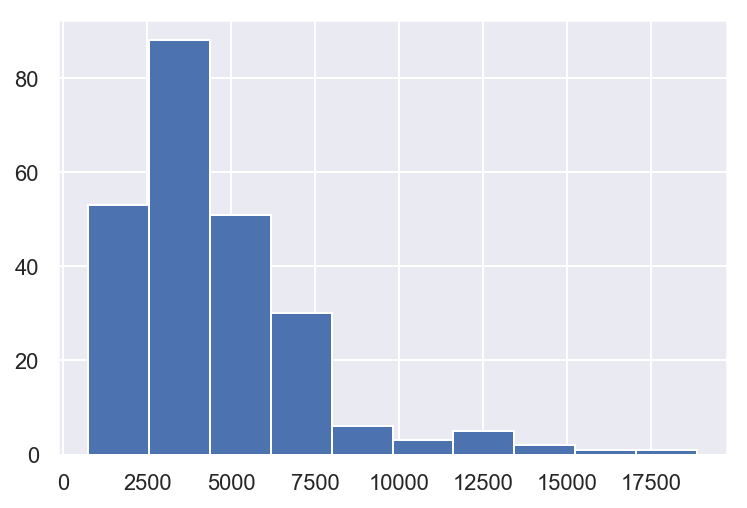

In [74]:
fixation_timeline.loc[ fixation_timeline["parcode"] == 35]['RT'].hist()

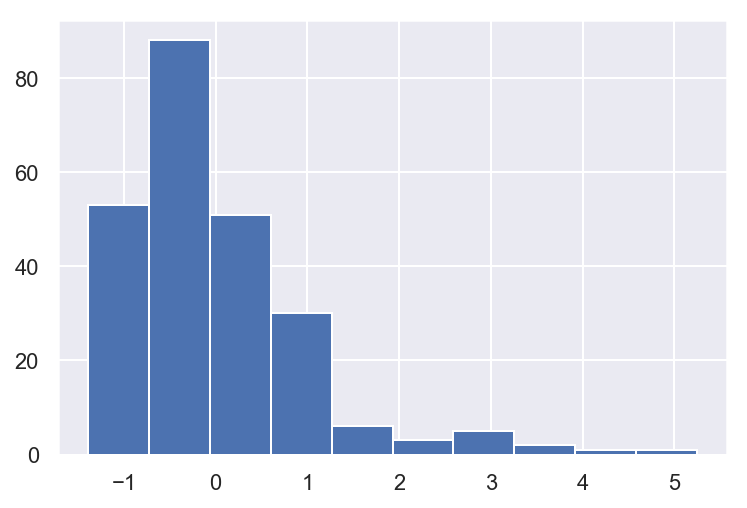

In [75]:
fixation_timeline.loc[ fixation_timeline["parcode"] == 35]['zRT'].hist()

<a id='reg'></a>
# Regression Analysis
-------------------------------------
 

## Loading data in R

In [95]:
data_exp1.columns

Index(['index', 'Unnamed: 0', 'Part', 'TrialN', 'PairID', 'LItem', 'LVal',
       'RItem', 'RVal', 'Choice', 'RT', 'Conf', 'ConfRT', 'BlockCond', 'DDT',
       'LDwellTime', 'RDwellTime', 'GSF', 'LastFixat', 'DVal', 'zDVal',
       'AbsDVal', 'zAbsDVal', 'zConf', 'zRT', 'DFam', 'LFam', 'RFam', 'TotFam',
       'TotVal', 'ChosenFam', 'UnchosenFam', 'ChosenVal', 'UnchosenVal',
       'Correct', 'LValConfBDM', 'LFamConfBDM', 'RValConfBDM', 'RFamConfBDM',
       'zDFam', 'zTotFam', 'zTotVal', 'zChosenVal', 'zUnchosenVal',
       'zChosenFam', 'zUnchosenFam', 'zGSF', 'zDDT', 'zAbsDDT', 'zAbsDFam',
       'zLVal', 'zRVal', 'zLFam', 'zRFam', 'zLValConfBDM', 'zLFamConfBDM',
       'zRValConfBDM', 'zRFamConfBDM', 'ConfSplit', 'GSFSplit', 'DDTSplit',
       'LmSacc', 'RmSacc', 'DmSacc', 'AbsDmSacc', 'TotmSacc', 'LmSaccTime',
       'RmSaccTime', 'DmSaccTime', 'AbsDmSaccTime', 'zLmSacc', 'zRmSacc',
       'zDmSacc', 'zAbsDmSacc', 'zTotmSacc', 'zLmSaccTime', 'zRmSaccTime',
       'zDmSaccTime', 'z

In [102]:
data_exp1

,index,Unnamed: 0,Part,TrialN,PairID,LItem,LVal,RItem,RVal,Choice,...,HighValPos,LowValPos,NormLmSacc,NormRmSacc,NormDmSacc,AbsNormDmSacc,zNormDmSacc,zAbsNormDmSacc,IDT,zIDT
0,0,0,1,1,14,116_boots_caramels.png,0.95,31_beef_jerky.png,2.00,1,...,2,1,0.002134,0.001592,-0.000542,0.000542,-0.227585,-0.392417,184.0,1.252920
1,1,1,1,2,44,102_propercorn_worcester.png,2.30,26_yorkie.png,1.70,1,...,1,2,0.001658,0.001130,-0.000528,0.000528,-0.214215,-0.412162,-802.0,-1.023039
2,2,2,1,3,51,59_crunchie.png,1.70,5_caramello.png,1.25,1,...,1,2,0.003922,0.002869,-0.001052,0.001052,-0.725941,0.343535,-1136.0,-1.794003
3,3,3,1,4,12,64_nestle_aero_mint.png,1.55,102_propercorn_worcester.png,2.30,0,...,2,1,0.001988,0.002632,0.000644,0.000644,0.930937,-0.246107,-1702.0,-3.100486
4,4,4,1,5,4,44_walkers_french_fries.png,2.00,111_propercorn_sweetnsalty.png,2.00,0,...,1,2,0.002875,0.001976,-0.000899,0.000899,-0.576246,0.122471,-1380.0,-2.357222
5,5,5,1,6,39,50_nakd_rhubarb_and_custard.png,0.65,39_milkyway.png,1.25,0,...,2,1,0.001994,0.000000,-0.001994,0.001994,-1.646025,1.702277,-216.0,0.329610
6,6,6,1,7,59,54_milkyway_magic_stars.png,1.55,30_starburst_original.png,1.10,1,...,1,2,0.002985,0.002208,-0.000778,0.000778,-0.457658,-0.052655,-756.0,-0.916858
7,7,7,1,8,16,116_boots_caramels.png,0.95,104_graze_sriracha.png,0.65,1,...,1,2,0.003229,0.002509,-0.000721,0.000721,-0.402045,-0.134782,-1482.0,-2.592666
8,8,8,1,9,1,62_cadbury_wispa.png,1.55,47_daim.png,1.70,1,...,2,1,0.002494,0.001310,-0.001184,0.001184,-0.854527,0.533426,-2124.0,-4.074578
9,9,9,1,10,48,44_walkers_french_fries.png,2.00,53_eat_natural_almond_apricot.png,1.10,1,...,1,2,0.001845,0.001513,-0.000332,0.000332,-0.022429,-0.695384,-2307.0,-4.496992


In [96]:
%R -i data_exp1 

In [97]:
%%R
library(lme4)
library(car)
library(optimx)
library(ggplot2)
library(MASS)
library(broom)
library(dplyr)
library(reshape2)
library(arm)
library(multcomp)
library(pbkrtest)

In [103]:
%%R
# Separating the data for both conditions 
data_exp1_Like <- data_exp1[ which(fixation_timeline_R$Block=='1'), ]
data_exp1_DisLike <- data_exp1[ which(fixation_timeline_R$Block=='2'), ]

<a id='regCond'></a>
# Regressions per Condition (Like/Dislike)


[1] "Like BIC:"
[1] 3580.509
[1] "DisLike BIC:"
[1] 3946.621


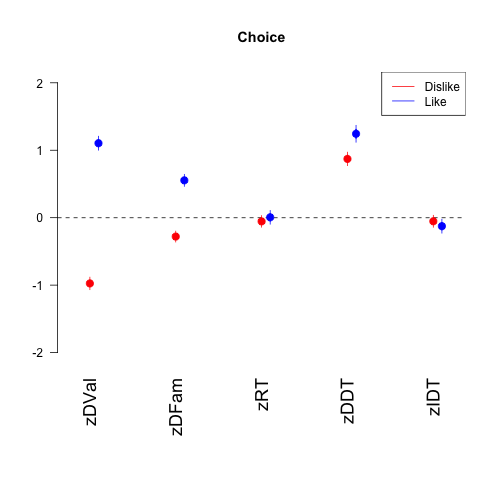

In [108]:
%%R

title_plot = "Choice"

ModelChoiceL_1 <- glm(Choice ~ zDVal +zDFam + zRT + zDDT + zIDT, data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_1 <- glm(Choice ~ zDVal +zDFam+ zRT + zDDT + zIDT , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-2, 2) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

In [106]:
%%R
summary(ModelChoiceL_1)$coefficients

                Estimate Std. Error     z value      Pr(>|z|)
(Intercept)  0.039693517 0.04116967  0.96414466  3.349734e-01
zDVal        1.147852062 0.05036136 22.79231668 5.464678e-115
zRT          0.002149481 0.04938595  0.04352413  9.652837e-01
zDDT         1.161222412 0.06041651 19.22028325  2.503994e-82
zIDT        -0.120609837 0.05074100 -2.37697025  1.745550e-02


In [107]:
%%R
summary(ModelChoiceD_1)$coefficients

                Estimate Std. Error      z value      Pr(>|z|)
(Intercept) -0.001180227 0.03887495  -0.03035957  9.757803e-01
zDVal       -1.000651602 0.04595793 -21.77320902 4.164304e-105
zRT         -0.057194729 0.04315041  -1.32547361  1.850141e-01
zDDT         0.921125268 0.04958729  18.57583263  5.041699e-77
zIDT        -0.055341030 0.04396037  -1.25888464  2.080720e-01


In [218]:
%%R    
# Extract Coefficients
MChoiceL_Coef = summary(ModelChoiceL_1)$coefficients[2:4,1]
MChoiceD_Coef = summary(ModelChoiceD_1)$coefficients[2:4,1]

# Extract Standard Error
MChoiceL_SE = summary(ModelChoiceL_1)$coefficients[2:4,2]
MChoiceD_SE = summary(ModelChoiceD_1)$coefficients[2:4,2]

# Extract p-value
MChoiceL_p = summary(ModelChoiceL_1)$coefficients[2:4,4]
MChoiceD_p = summary(ModelChoiceD_1)$coefficients[2:4,4]


In [219]:
%R -o MChoiceL_Coef  -o MChoiceD_Coef 

MChoiceL_coef = MChoiceL_Coef
MChoiceD_coef = MChoiceD_Coef

In [220]:
%R -o MChoiceL_SE  -o MChoiceD_SE 

MChoiceL_se = MChoiceL_SE
MChoiceD_se = MChoiceD_SE

In [221]:
%R -o MChoiceL_p  -o MChoiceD_p 

MChoiceL_pval = MChoiceL_p
MChoiceD_pval = MChoiceD_p

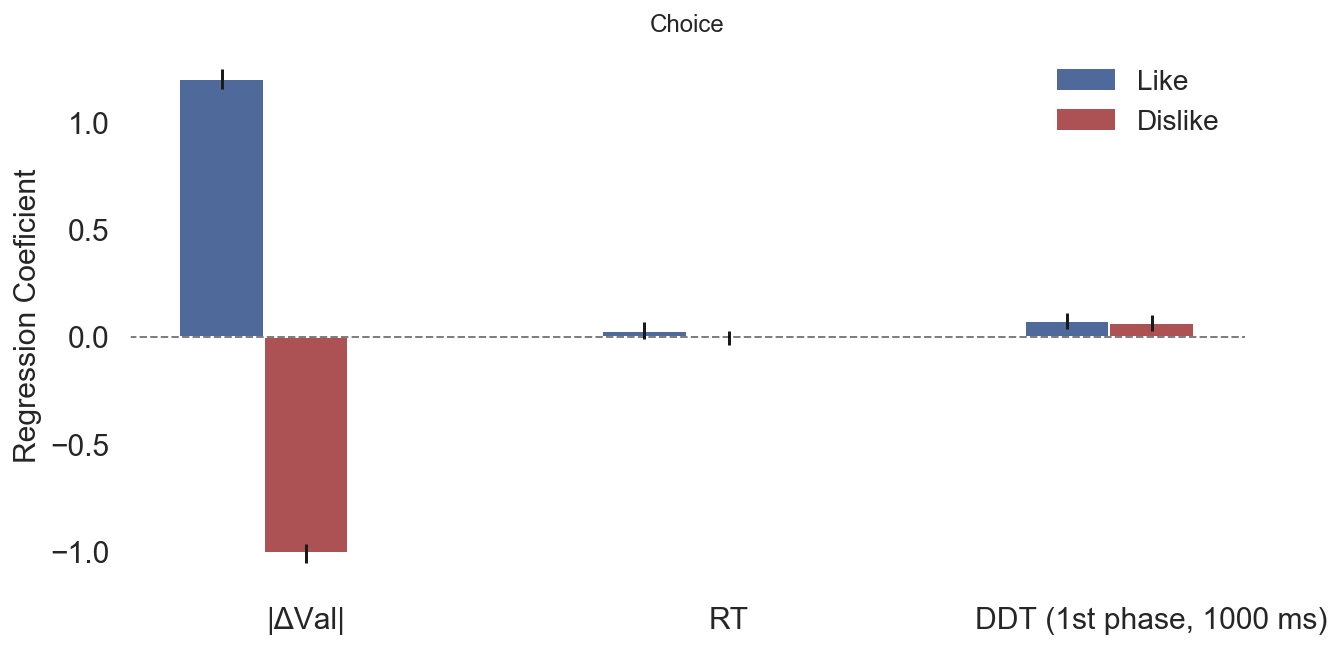

In [222]:
x1 = np.arange(len(MChoiceL_coef))-.1
x2 = np.arange(len(MChoiceL_coef))+.1

fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_facecolor('xkcd:white')

width_bars = 0.2

plt.bar(x1, MChoiceL_coef,yerr=MChoiceL_se, color=['#4F6A9A' ],width = width_bars,hatch='')
plt.bar(x2, MChoiceD_coef, yerr=MChoiceD_se,  color=['#AC5255' ],width = width_bars,hatch='')

plt.xticks(x2, ( '|ΔVal|', 'RT','DDT (1st phase, 1000 ms)'),fontsize=15)
#plt.ylim(950, 1200)

ChoiceL_patch = mpatches.Patch(color='#4F6A9A', label='Like')
ChoiceD_patch = mpatches.Patch(color='#AC5255', label='Dislike')

plt.yticks(fontsize=15)
plt.ylabel('Regression Coeficient',fontsize=15)
leg = plt.legend(handles=[ChoiceL_patch,ChoiceD_patch],fontsize=14)
leg.get_frame().set_facecolor('none')
leg.get_frame().set_linewidth(0.0)

ax.axhline(0, color='black', lw=1,linestyle =  '--', alpha = 0.5)
#ax.axvline(0, color='black', lw=1,linestyle =  '--', alpha = 0.5)

sns.despine(left =False, bottom = False)


#for i in range(len(Models_WAIC)):
#    position_parts= np.full(len(Models_WAIC_part[i]),i, dtype=int)
#    jittr = np.random.uniform(low=-0.2,high=0.2,size=len(Models_WAIC_part[i]))/2
#    ax.plot(position_parts+jittr, Models_WAIC_part[i], marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
plt.title('Choice')
plt.show()
#fig.savefig(str('SavedFigures/GLAM_individual_Like_BalanceEvidence_TotVal.png'), dpi = 200 )

## --[END]--

------------------------------------

<a id='ImpPkg'></a>
# 1. Import Packages

In [3]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF

import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob

import os
# Added to avoid OMP:error#15
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
import rpy2

%load_ext rpy2.ipython
# Set up interface with R
# Make it easy to set and find values in a multi-index DF
idx = pd.IndexSlice
# Set up interface with R
%config InlineBackend.figure_format = 'retina'
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)


<a id='LoadFunc'></a>
# 2. Defining Functions

#### Taken from Folke et al. (2016)

### Plot distributions

In [5]:
def participant_densities(data, var, xlim=(0,100), rug=True):
    # a counter that tells us where a given participant's data should be plotted
    order = 1

    # a list of all the participants in the dataset
    participants = data.loc[:, 'Part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(15,70))

    for x in participants:
        # defining the sub figures
            sub={}
            sub['%s' % x] = plt.subplot(len(participants)/2, 3, order)
            sns.kdeplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x], shade=True)
            #if rug==True:
            #    sns.rugplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x])
            sub['%s' % x].set_title('participant %s' % x)
            #sub['%s' % x].set_xlim(xlim)
            order += 1

### Split variable into participantwise quantiles

In [6]:
def parsplit(DF, input, quantiles):
    qvalues = pd.qcut(DF[input], quantiles, labels = range(1, quantiles+1),duplicates= 'drop')

    return qvalues

### Full simple logistic graph

In [7]:
def logisticplot_all (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)


    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    
    print ('high measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

    
    
    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5)


    #Plotting the binned data
    data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
    # determine the x coordinates
    x_cords= data.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
    # determine high y coordinates
    y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine high y standard errors
    test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    # plot the low points
    plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
    # plot low error bars
    plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    # plot the high points
    plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
    # plot high error bars
    plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=0, prop={'size':20})
    sns.despine()

### Full simple logistic graph (no bins)

In [8]:
def logisticplot_simpl (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()
    print ('Low measure coef',clf.coef_)
    
    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    print ('High measure coef',clf.coef_)



    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5) 
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=0, prop={'size':20})
    sns.despine()

### Regression Coefficients Plot

In [9]:
def Coefpresplot(regtable, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0.75, len(regtable.columns) + 0.25)
        YLim = (round_to_5(regtable.loc['CImin', :].min()-0.1), round_to_5(regtable.loc['CImax', :].max()+0.2))
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        YLim = (round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.2), round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color=colourlist[position-1])

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [10]:
def Coefpresplot2(regtable,regtable2, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    

    # Set axis limits based on whether to include the intercept or not    
    
       
    
    if intercept == True:
        
        XLim = (0.75, len(regtable.columns) + 0.25)
        
        #Determine the Ymax and Ymin for both regresions results
        if round_to_5(regtable.loc['CImin', :].min()) < round_to_5(regtable2.loc['CImin', :].min()):
            Ymin = round_to_5(regtable.loc['CImin', :].min()-0.5)
        else :
            Ymin = round_to_5(regtable2.loc['CImin',:].min()-0.5)
        if round_to_5(regtable.loc['CImax', :].max()) > round_to_5(regtable2.loc['CImax', :].max()):
            Ymax = round_to_5(regtable.loc['CImax', :].max()+0.5)
        else :
            Ymax = round_to_5(regtable2.loc['CImax', :].max()+0.5)      

        YLim = (Ymin, Ymax)    
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        
        #Determine the Ymax and Ymin for both regresions results
        if round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()) < round_to_5(regtable2.loc['CImin', regtable.columns[1]:].min()):
            Ymin = round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.5)
        else :
            Ymin = round_to_5(regtable2.loc['CImin',regtable.columns[1]:].min()-0.5)
        if round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()) > round_to_5(regtable2.loc['CImax', regtable.columns[1]:].max()):
            Ymax = round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.5)
        else :
            Ymax = round_to_5(regtable2.loc['CImax', regtable.columns[1]:].max()+0.5)      
        
        YLim = (Ymin, Ymax)
    
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # both regtable should have the same regressors (and in the same order)

    if intercept == True:
        Coefficients = regtable.columns
 #       Coefficients2 = regtable2.columns
    else:
        Coefficients = regtable.columns[1:]
#        Coefficients2 = regtable2.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position-0.1, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color='blue',label = 'Like')
        ax.plot(position+0.1, regtable2.loc['coefficient', Coefficient], marker='X', ms=8, color='red', label = 'Dislike')


        ax.errorbar(position-0.1, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color='blue')
        ax.errorbar(position+0.1, regtable2.loc['coefficient', Coefficient],
                    yerr=regtable2.loc['se', Coefficient]*1.96, lw=2, color='red')
        
        if position == 1:
            ax.legend( prop={'size': 20})

 
    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))

    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()

    sns.despine()
    fig.savefig(str('SavedFigures/'+title +'.png'), dpi = 200 )

In [11]:
def Coefpresplot_bar(regtable, mixtable, intercept=False, barcol='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0 ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0, len(regtable.columns) + 1)
        YLim = (round_to_5(np.min(mixtable)-0.2), round_to_5(np.max(mixtable)+0.2))
    else:
        XLim = (0, len(regtable.columns) )
        YLim = (round_to_5(np.min(mixtable)-0.2), round_to_5(np.max(mixtable)+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = [barcol] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.bar(position, regtable.loc['coefficient', Coefficient], width=0.8,color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color='#000000')
        
   # Plot dots for the individual coefficients
    coef_num = len(mixtable)
    for i in range(1,coef_num):
        part_coefs = mixtable[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.5,high=0.5,size=len(part_coefs))/2
        ax.plot(position_parts+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [12]:
def Coefpresplot_bar2(regtable1, mixtable1,regtable2, mixtable2, intercept=False, barcol1='#000000',barcol2='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0 ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not   
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients
    if intercept == True:
        XLim = (0, len(regtable1.columns) + 2)
        YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
    else:
        XLim = (0, len(regtable1.columns) +1)
        YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients

    if intercept == True:
        Coefficients = regtable1.columns
    else:
        if len(regtable1.columns)<len(mixtable1):
            Coefficients = regtable1.columns
        else:
            Coefficients = regtable1.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    # Color for conditions 1 and 2
    colourlist1 = [barcol1] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    colourlist2 = [barcol2] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        # Plot condition 1
        ax.bar(position-0.2, regtable1.loc['coefficient', Coefficient], width=0.4,color=colourlist1[position-1],)
        ax.errorbar(position-0.2, regtable1.loc['coefficient', Coefficient],
                    yerr=regtable1.loc['se', Coefficient]*1.96, lw=2, color='#000000')

        # Plot condition 2
        ax.bar(position+0.2, regtable2.loc['coefficient', Coefficient], width=0.4,color=colourlist2[position-1],)
        ax.errorbar(position+0.2, regtable2.loc['coefficient', Coefficient],
                    yerr=regtable2.loc['se', Coefficient]*1.96, lw=2, color='#000000')

        
   # Plot dots for the individual coefficients
    # Assumuing that mixtable1 and mixtable2 have exactly the same number of elements 
    
    if intercept == True:
        coef_num = range(0,len(mixtable1)) 
    else:
        coef_num = range(1,len(mixtable1))
        
    for i in coef_num:
        # Plot dots condition 1
        part_coefs = mixtable1[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(position_parts-0.2+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        # Plot dots condition 1
        part_coefs = mixtable2[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(position_parts+0.2+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable1.columns, rotation=0)        
    else:
        if len(regtable1.columns)<len(mixtable1):
            ax.set_xticklabels(regtable1.columns, rotation=0)
        else:    
            ax.set_xticklabels(regtable1.columns[1:], rotation=0)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [13]:
def regtable(fix, fix_se, names):
    fixed_betas = DF(np.array(fix)); fixed_betas = fixed_betas.transpose(); fixed_betas.columns = names
    fixed_betas.loc[1] = np.array(fix_se)
    fixed_betas.loc[2] = fixed_betas.loc[0] - (fixed_betas.loc[1]*1.96)
    fixed_betas.loc[3] = fixed_betas.loc[0] + (fixed_betas.loc[1]*1.96)
    fixed_betas.index = ['coefficient', 'se', 'CImin', 'CImax']
    return fixed_betas

In [14]:
def correl_plot2 (data_all,data_all2,x_variable,y_variable,color1 = '#000000',color2 = '#000000',x_varlabel = "x_variable" ,y_varlabel = "y_variable", data_label =('Correct', 'Error'), title = "Pretty PLot"):

    f = plt.figure(figsize=(8, 8))
    sns.set(style='white', font_scale=1.8)
    ax = sns.regplot(data=data_all, x= x_variable, y=y_variable, fit_reg=False, ci=0, color= color1, scatter_kws={'s':70,'alpha':0.3},)
    ax = sns.regplot(data=data_all2, x= x_variable, y=y_variable, fit_reg=False, ci=0, color= color2, scatter_kws={'s':70,'alpha':0.3})
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)

    # For data 1
    x=data_all[x_variable]
    y=data_all[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    p1 = ax.plot(future, future_fit, color=color1, lw=3, label = data_label[0])
    
    results = pearsonr(data_all[x_variable], data_all[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    # For data 2
    x=data_all2[x_variable]
    y=data_all2[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    p2 = ax.plot(future, future_fit, color=color2, lw=3,label = data_label[1] )
    sns.despine()
    #ax.set_title(title)    
    results = pearsonr(data_all2[x_variable], data_all2[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    ax.legend()
    ax.set_title(title)

    #plt.legend((p1, p2), data_label )
    
    plt.show()

In [15]:
def logisticplot_all_sbj_slope(moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
#inputs example   
#logisticplot_all('DDTSplit', 'High DDT', 'Low DDT', data=data_expL, xaxis='zDVal', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in Value (DVal)',
#                 modhighcol='#4F6A9A', modlowcol='#B5C8E9', title='empty', parvar='Part')


    # Counter to know where to plot the particpant
    order = 1
    # Initialize the array to store coefs
    coefs_all = []

   # a list of all the participants in the dataset
    participants = data.loc[:, 'Part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(50,70))

    for x in participants:
        # defining the sub figures
            sub={}
            sub['%s' % x] = plt.subplot(int(len(participants)/5+1), 5, order)
            
            
            # Extract dataframe for that particualt participant
            data_in = data.loc[data['Part'] == x]
           
            sns.set(font_scale=1.5, style='white')
           
            # defining the sigmoid function
            def model(x):
                y = 1 / (1 + np.exp(-x))
                return y

            #sub = plt.subplot()
            sub['%s' % x].set_title('participant %s' % x)


            #run the classifier
            clf = linear_model.LogisticRegression(C=1e5)

            # Paula used these dictionaries to store the values of the predictive lines for all the participants.
            logit_low = {}
            logit_high = {}
            logit_all = {}

            
            # I think this defines the problem space
            X_test = np.linspace(-5,10,300)

            # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in.loc[data_in[(data[moderator]==0)].index, xaxis][:, np.newaxis],
                    data_in.loc[data_in[(data[moderator]==0)].index, yaxis])
            logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x , ' Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

            low_coef = clf.coef_
            low_intercept = clf.intercept_
            
            # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in.loc[data_in[(data_in[moderator]==1)].index, xaxis][:, np.newaxis],
                    data_in.loc[data_in[(data_in[moderator]==1)].index, yaxis])
            logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
            
            high_coef = clf.coef_
            high_intercept = clf.intercept_
            
            
            # fitting the predictive logistic model for all the trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in[xaxis][:, np.newaxis],
                    data_in[yaxis])
            logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
            
            all_coef = clf.coef_
            all_intercept = clf.intercept_
    
            #Plotting the predictive lines
            line_high = sub['%s' % x].plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
            line_low = sub['%s' % x].plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5)
            line_all = sub['%s' % x].plot(X_test, logit_all, color="#000000", linewidth=3, label=modlow, zorder=5,linestyle='--')
            
            coefs_part= np.column_stack((x,low_coef,low_intercept,high_coef,high_intercept,all_coef,all_intercept))
            coefs_all.append(coefs_part[0])

            
            #Plotting the binned data
            data_in['DVBin2'] = data_in.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values[0]

            # determine the x coordinates
            x_cords= data.groupby('DVBin2')[xaxis].mean()

            # determine low y coordinates
            y_cords_low = data_in.loc[(data_in[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values

            # determine low y standard errors
            test = pd.DataFrame(data_in.loc[(data_in[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
            y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

    
            # determine high y coordinates
            y_cords_high = data_in.loc[(data_in[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values

            # determine high y standard errors
            test2 = pd.DataFrame(data_in.loc[data_in[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
            y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

            # plot the low points
            plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
            # plot low error bars
            plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)

            # plot the high points
            plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
            # plot high error bars
            plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)

    
            # Set Labels
           # sub['%s' % x].set_ylabel(ylab, fontsize=30)
           # sub['%s' % x].set_xlabel(xlab, fontsize=30)

            # Set Ticks
            sub['%s' % x].set_xticks((-5,-3,-1,1,3,5))
            sub['%s' % x].set_yticks((0,0.25,0.5,0.75,1))
            sub['%s' % x].tick_params(axis='both', which='major', labelsize=20)

            # Set Limits
            sub['%s' % x].set_ylim(-0.01, 1.01)
            sub['%s' % x].set_xlim(-5, 5)
        

            sns.despine()
            
            order += 1
    
    custom_lines = [Line2D([0], [0], color=modhighcol, lw=4),
                Line2D([0], [0], color=modlowcol, lw=4)]
    fig.legend(custom_lines, [modhigh, modlow],loc = 4)       

    fig.text(0.5, 0.0, xlab, ha='center')
    fig.text(0.0, 0.5, ylab, va='center', rotation='vertical')
    
    coefs_all = pd.DataFrame(coefs_all,columns=['Participant','Low Coef','Low Intercept','High Coef','High Intercept','All Coef','All Intercept'])
    return coefs_all

In [16]:
def z_score1(data_all, part_def,z_score_var):
    z_matrix=[]
    z_matrix_aux=[]

    for i in (data_all[part_def].unique()):
        Choicedata = data_all.loc[data_all[part_def] == i]    
    
        pX_A= pd.to_numeric(Choicedata[z_score_var]) 
        pX_zA= (pX_A - np.mean(pX_A))/np.std(pX_A)

        z_matrix_aux= pX_zA.values
    
        for  j in range(len(z_matrix_aux)):    
            z_matrix.append(z_matrix_aux[j])
    return z_matrix

In [17]:
def correl_plot(data_all,x_variable, x_varlabel,y_variable,y_varlabel):

    f = plt.figure(figsize=(8, 8))
    sns.set(style='white', font_scale=1.8)
    ax = sns.regplot(data=data_all, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
    #sns.regplot(data=data_exp1, x='AbsDiffValue', y='Confidence', fit_reg=False, ci=0, color='Black', scatter_kws={'s':50})
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
    #exp1 = mpatches.Patch(color='#000000', label='Experiment c1')
    #exp2 = mpatches.Patch(color='#AAAAAA', label='Experiment 2')
    #plt.legend(handles=[exp1, exp2], loc=3)
    x=data_all[x_variable]
    y=data_all[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    ax.plot(future, future_fit, color='Green', lw=3)
    sns.despine()
    #ax.set_title(title)    
    results = pearsonr(data_all[x_variable], data_all[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    plt.xlim(min(x),max(x))
    plt.ylim(min(y),max(y))
    
    
    plt.show()


In [18]:
def ttestsPlot2(data1, data2,c1 ='#4F6A9A',c2 = '#AC5255',lab1 = "Like", lab2 = "Dislike",ylab = '',title = ''):

    # t-TEST
    diff = mean(data1) - mean(data2)
    [s, p] = stats.ttest_rel(data1,data2)
    print ("MeanL = "+ str(round(mean(data1),2))+ "; MeanD = "+ str(round(mean(data2),2))+"; [Like - Dislike] =  " + str(round(diff,2) ) +"; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,2)) )
    
        
    # PLOT LIKE AND DISLIKE VARIABILITY
        
    # Set seaborn style for the plot
    #fig = plt.figure(figsize=[6,10])
    sns.set(style='white',font_scale=1.5)
    jittr = np.random.uniform(low=-0.3,high=0.3,size=len(data1))    
    plt.scatter([1]*len(data1)+jittr, data1, c= c1, alpha=0.7,label=lab1)
    plt.scatter([2]*len(data2)+jittr, data2, c= c2, alpha=0.7,label=lab2)
    
    ## add lines between slope points in like and dislike for each participant
    
    for i in range(len(data1)):
        plt.plot( [1 + jittr[i],2 + jittr[i]], [ data1[i] , data2[i]],'--', lw=1.0, color = 'black', alpha = 0.2)

    se1 = std(data1)/sqrt(len(data1))
    se2 = std(data2)/sqrt(len(data2))

    plt.errorbar([1], [mean(data1)], yerr=se1*1.96, lw=2, color='#000000')
    plt.errorbar([2], [mean(data2)], yerr=se2*1.96, lw=2, color='#000000')
        
    plt.scatter( [1] ,  [mean(data1)] , color = c1,s=140,edgecolors = 'black', )
    plt.scatter( [2] ,  [mean(data2)] , color = c2,s=140,edgecolors = 'black', )

    #legend(loc = 'best')
    plt.xticks([1, 2,], [lab1, lab2],fontsize=25)
    plt.ylabel(ylab, fontsize=25)
    plt.title(title, fontsize=25)
    
    sns.despine()

In [19]:
def ttestsBarPlot2(data1, data2,c1 ='#4F6A9A',c2 = '#AC5255',lab1 = "Like", lab2 = "Dislike",ylab = '',title = ''):

    # t-TEST
    diff = mean(data1) - mean(data2)
    [s, p] = stats.ttest_rel(data1,data2)
    print ("MeanL = "+ str(round(mean(data1),2))+ "; MeanD = "+ str(round(mean(data2),2))+"; [Like - Dislike] =  " + str(round(diff,2) ) +"; t =  " + str(round(s,2)) + " ; p-value =" + str(round(p,2)) )
    
    # Set seaborn style for the plot
    fig = plt.figure(figsize=[6,10])
    sns.set(style='white',font_scale=1.5)
    jittr = np.random.uniform(low=-0.3,high=0.3,size=len(data1))    

    se1 = std(data1)/sqrt(len(data1))
    se2 = std(data2)/sqrt(len(data2))
    
    plt.bar( [1] ,  [mean(data1)] , color = c1, zorder = 0)
    plt.bar( [2] ,  [mean(data2)] , color = c2, zorder = 0)
    plt.errorbar([1], [mean(data1)], yerr=se1*1.96, lw=2, color='#000000')
    plt.errorbar([2], [mean(data2)], yerr=se2*1.96, lw=2, color='#000000')
                    
    plt.scatter([1]*len(data1)+jittr, data1, c= '#000000', alpha=0.5,label=lab1)
    plt.scatter([2]*len(data2)+jittr, data2, c= '#000000', alpha=0.5,label=lab2)
    
    ## add lines between slope points in like and dislike for each participant
    
    for i in range(len(data1)):
        plt.plot( [1 + jittr[i],2 + jittr[i]], [ data1[i] , data2[i]],'--', lw=1.0, color = 'black', alpha = 0.2)

    plt.xticks([1, 2,], [lab1, lab2],fontsize=25)
    plt.ylabel(ylab, fontsize=25)
    plt.title(title, fontsize=25)
    
    sns.despine()

In [20]:
def logisticplot_like_dislike (data1,data2,modlow,modhigh, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',modlowcol='#AAAAAA',modhighcol='#000000', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()

    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the condition 1 
    clf.fit(data1[xaxis][:, np.newaxis],
            data1[yaxis][:, np.newaxis]) 
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

    # fitting the predictive logistic model for the condition 2 
    clf.fit(data2[xaxis][:, np.newaxis],
            data2[yaxis][:, np.newaxis ])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    
    print ('high measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
    
    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5)

 
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=0, prop={'size':20},frameon = False)
    sns.despine()

In [21]:
def logisticplot_like_dislike_bins (data1,data2,modlow,modhigh, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',modlowcol='#AAAAAA',modhighcol='#000000', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()



    #Plotting the binned data
    data1['DVBin2'] = data1.groupby(parvar).apply(parsplit, input=xaxis, quantiles=5).values
    data2['DVBin2'] = data2.groupby(parvar).apply(parsplit, input=xaxis, quantiles=5).values
    
    # determine the x coordinates
    x_cords1= data1.groupby('DVBin2')[xaxis].mean()
    x_cords2= data2.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data1.groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data1.groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
    # determine high y coordinates
    y_cords_high = data2.groupby('DVBin2')[yaxis].mean().values
    
    # determine high y standard errors
    test2 = pd.DataFrame(data1.groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    # plot the low points
    plt.scatter(x_cords1, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1,label=modlow)
    # plot low error bars
    plt.errorbar(x_cords1, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    # plot the high points
    plt.scatter(x_cords2, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2,label=modhigh)
    # plot high error bars
    plt.errorbar(x_cords2, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
  #  sub.set_xticks((-5,-3,-1,1,3,5))
  #  sub.set_yticks((0,0.25,0.5,0.75,1))
  #  sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
  #  sub.set_ylim(-0.01, 1.01)
  #  sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=8, prop={'size':20})
    sns.despine()

In [22]:
def logisticplot_like_dislike_onlyOne (data1,modlow, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()

    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the condition 1 
    clf.fit(data1[xaxis][:, np.newaxis],
            data1[yaxis][:, np.newaxis]) 
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
    
    #Plotting the predictive lines
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5)

    #Plotting the binned data
    data1['DVBin2'] = data1.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
    # determine the x coordinates
    x_cords1= data1.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data1.groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data1.groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    

    # plot the low points
    plt.scatter(x_cords1, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
    # plot low error bars
    plt.errorbar(x_cords1, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
        
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc='lower left', prop={'size':20},frameon = False,)
    sns.despine()

In [23]:
def logisticplot_like_dislike_plotAndbins (data1,data2,modlow,modhigh, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',modlowcol='#AAAAAA',modhighcol='#000000', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()

    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the condition 1 
    clf.fit(data1[xaxis][:, np.newaxis],
            data1[yaxis][:, np.newaxis]) 
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

    # fitting the predictive logistic model for the condition 2 
    clf.fit(data2[xaxis][:, np.newaxis],
            data2[yaxis][:, np.newaxis ])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    
    print ('high measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
    
    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5)

    #Plotting the binned data
    data1['DVBin2'] = data1.groupby(parvar).apply(parsplit, input=xaxis, quantiles=5).values
    data2['DVBin2'] = data2.groupby(parvar).apply(parsplit, input=xaxis, quantiles=5).values
    
    # determine the x coordinates
    x_cords1= data1.groupby('DVBin2')[xaxis].mean()
    x_cords2= data2.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data1.groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data1.groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
    # determine high y coordinates
    y_cords_high = data2.groupby('DVBin2')[yaxis].mean().values
    
    # determine high y standard errors
    test2 = pd.DataFrame(data1.groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    # plot the low points
    plt.scatter(x_cords1, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
    # plot low error bars
    plt.errorbar(x_cords1, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    # plot the high points
    plt.scatter(x_cords2, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
    # plot high error bars
    plt.errorbar(x_cords2, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc='lower left', prop={'size':20},frameon = False)
    sns.despine()